## Pyfolio Return Visualization

In [1]:
import numpy as np
import pandas as pd
import pyfolio as pf
import zipline as zp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
msft = pd.read_csv("MSFT.csv")
msft.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-12-31,26.370001,26.495001,25.629999,25.850000,18.759558,58208800
1,2003-01-02,26.150000,26.875000,25.855000,26.860001,19.492527,67025200
2,2003-01-03,26.795000,26.900000,26.440001,26.895000,19.517916,55546800
3,2003-01-06,27.010000,27.615000,26.900000,27.385000,19.873522,59456200
4,2003-01-07,27.459999,28.004999,27.340000,27.900000,20.247257,80517400


In [3]:
spy = pd.read_csv("SPY.csv")
spy.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-12-31,87.989998,88.430000,87.110001,88.230003,64.252350,34036600
1,2003-01-02,88.849998,91.300003,88.540001,91.070000,66.320541,44516300
2,2003-01-03,90.910004,91.379997,90.500000,91.349998,66.524437,32222600
3,2003-01-06,91.239998,93.489998,91.169998,92.959999,67.696915,40984500
4,2003-01-07,92.900002,93.370003,92.199997,92.730003,67.529419,38640400


In [4]:
msft['Date'] =  pd.to_datetime(msft['Date'], format='%Y/%m/%d')
msft.index = msft["Date"]
msft = msft.drop('Date',1)

In [5]:
spy['Date'] =  pd.to_datetime(spy['Date'], format='%Y/%m/%d')
spy.index = spy["Date"]
spy = spy.drop('Date',1)

In [19]:
X_m = msft["Close"]
X_s = spy["Close"]
# scaling
X_m_scaled = msft["Close"]/msft["Close"].iloc[0]
X_s_scaled = spy["Close"]/spy["Close"].iloc[0]


## MSFT VS SPY

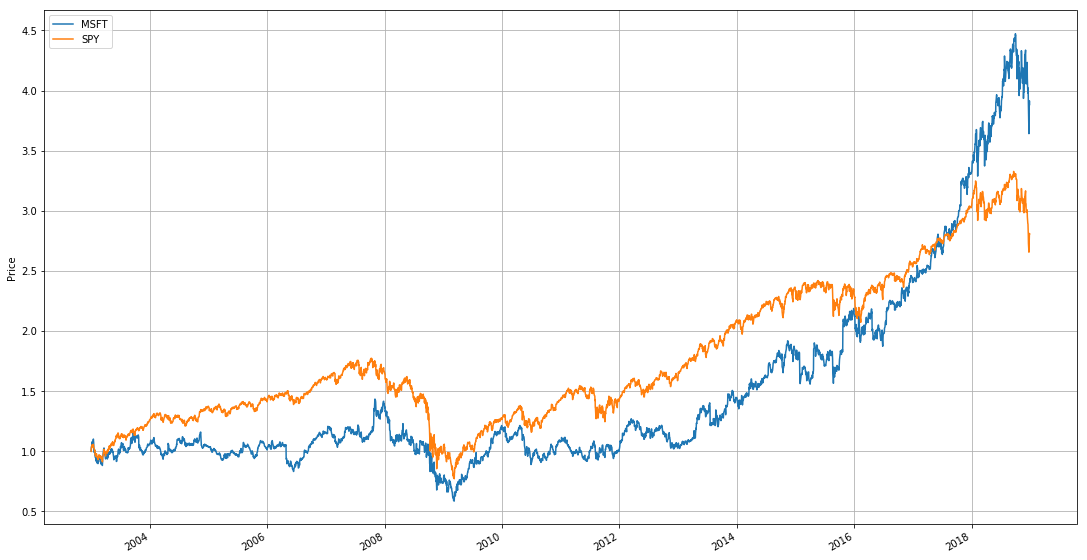

In [20]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(X_m_scaled.index, X_m_scaled.values)
plt.plot(X_s_scaled.index, X_s_scaled.values)

#plt.style.use('fivethirtyeight')
plt.ylabel('Price')
plt.legend(['MSFT','SPY']);
fig.autofmt_xdate()
plt.grid(True)
plt.show()

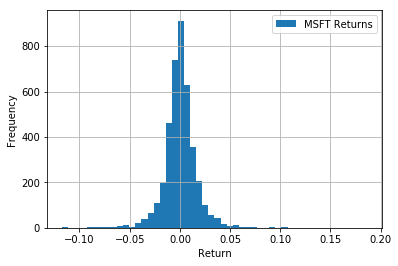

In [8]:
R_m = X_m.pct_change()[1:]
plt.hist(R_m, bins=50)
plt.grid(True)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

In [15]:
ret_s =spy["Close"].pct_change()
ret_s = ret_s.dropna()
ret_m =msft["Close"].pct_change()
ret_m = ret_m.dropna()

In [17]:
import seaborn as sns

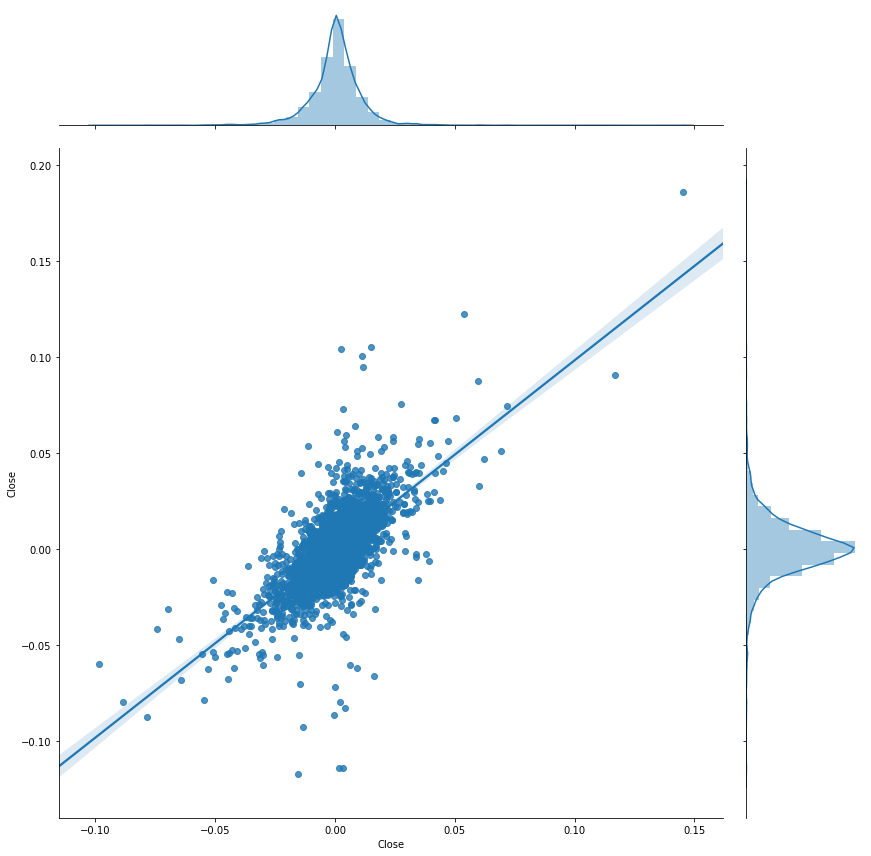

In [18]:
sns.jointplot(ret_s, ret_m, kind='reg', size=12)

Start date,2003-01-02
End date,2018-12-28
Total months,191
,Backtest
Annual return,6.7%
Cumulative returns,180.8%
Annual volatility,18.2%
Sharpe ratio,0.45
Calmar ratio,0.12
Stability,0.72
Max drawdown,-56.5%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,56.47,2007-10-09,2009-03-09,2013-03-14,1418
1,20.18,2018-09-20,2018-12-24,NaT,NaN
2,14.35,2015-05-21,2016-02-11,2016-07-12,299
3,13.73,2003-01-14,2003-03-11,2003-05-06,81
4,10.16,2018-01-26,2018-04-02,2018-08-24,151


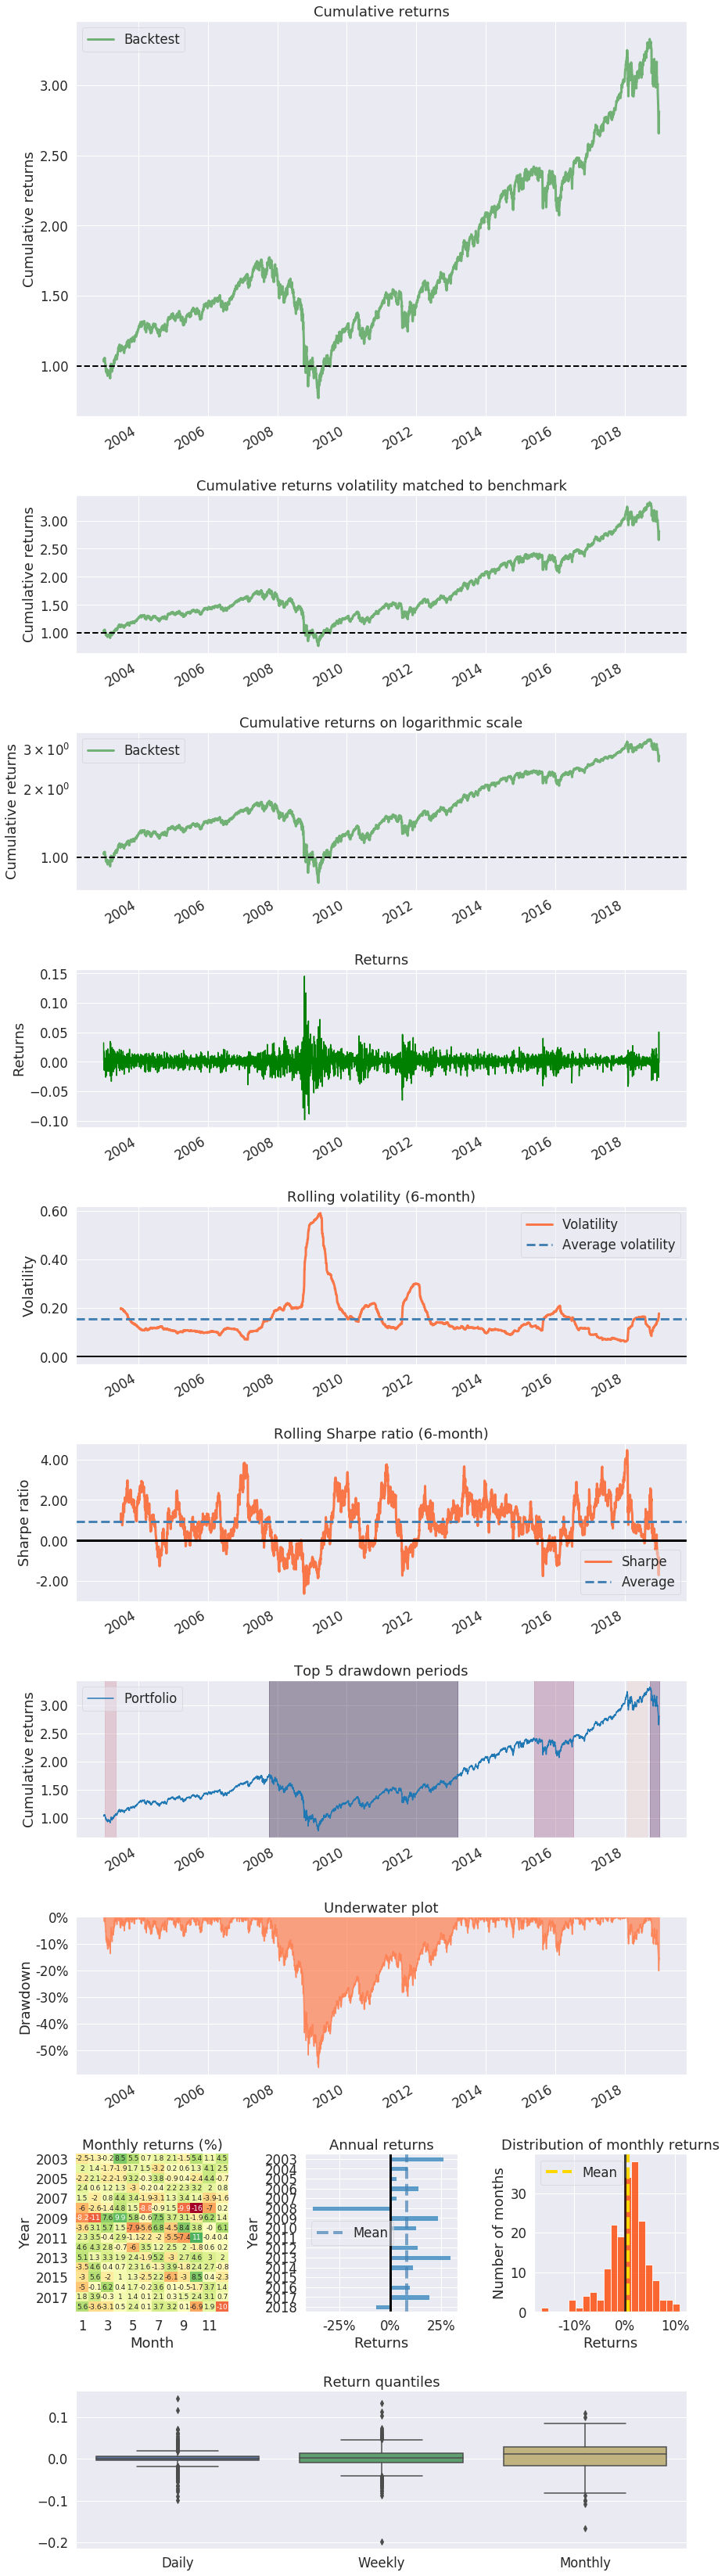

In [16]:
pf.create_returns_tear_sheet(ret_s)

### Moving Average

In [ ]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
MAVG_60 = pd.rolling_mean(X_m,60)
MAVG_20 = pd.rolling_mean(X_m,20)
plt.plot(X.index[-500:],X.values[-500:])
plt.plot( MAVG_60.index[-500:],MAVG_60.values[-500:])
plt.plot( MAVG_20.index[-500:],MAVG_20.values[-500:])
plt.legend(['MSFT','60 day MAVG','20 day MAVG'])
plt.grid(True)


In [ ]:
R_s = X_s.pct_change()[1:]

In [ ]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
R_m.plot()
R_s.plot()
plt.legend(['MSFT','SPY'])